## Plotting Titanic Dataset. (DDL: 04/28/2023)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


import pandas as pd

In [4]:
#loading xls making it into csv
#then loading csv
xls_file_path = 'data/titanic.xls'

df = pd.read_excel(xls_file_path)

csv_file_path = 'data/titanic.csv'

df.to_csv(csv_file_path, index=False)

titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 1. Create a horizontal bar chart for number of passengers survived by class 

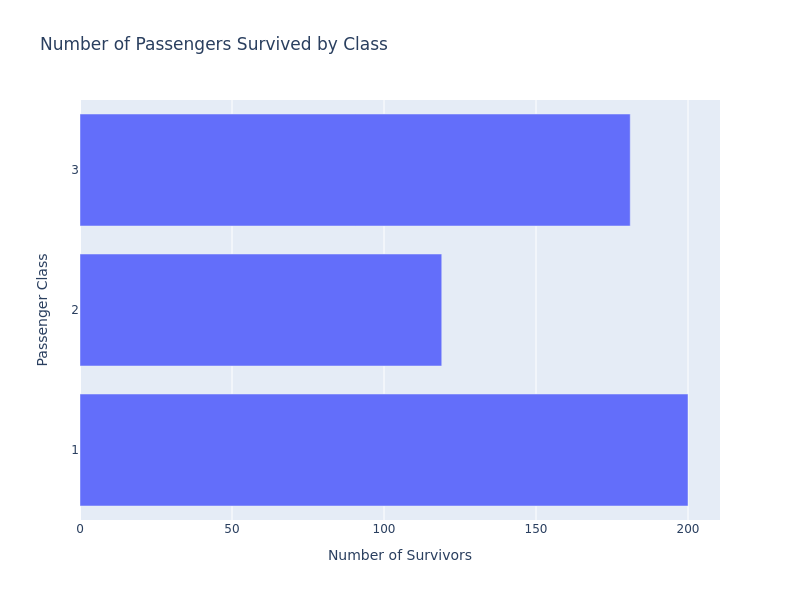

In [18]:
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

# Group by pclass and sum the survived column
survived_by_class = titanic.groupby('pclass')['survived'].sum().reset_index()

# Create the bar chart
fig = px.bar(survived_by_class, x='survived', y='pclass', orientation='h',
             title='Number of Passengers Survived by Class',
             labels={'pclass': 'Passenger Class', 'survived': 'Number of Survivors'})
fig.update_yaxes(type='category')  # Ensure the y-axis is treated as categorical to be visually consistent

fig.update_layout(width=800, height=600)

#fig.show()

# Save the figure as a PNG file
fig.write_image("num_by_class.png")

# Display the image in the notebook
Image(filename="num_by_class.png")



#### 2. Create a vertical bar chart for passengers survived by class and gender

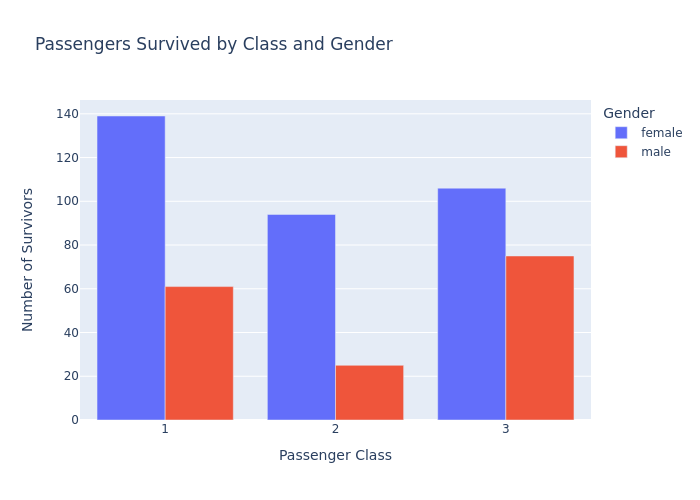

In [19]:
# Group by 'pclass' and 'sex', then sum the 'survived' column
survived_by_class_gender = titanic.groupby(['pclass', 'sex'])['survived'].sum().reset_index()

# Create a vertical bar chart
fig = px.bar(survived_by_class_gender, x='pclass', y='survived', color='sex',
             barmode='group',
             title='Passengers Survived by Class and Gender',
             labels={'pclass': 'Passenger Class', 'survived': 'Number of Survivors', 'sex': 'Gender'})
#fig.show()

# Save the figure as a PNG file
fig.write_image("num_by_class_gender.png")

# Display the image in the notebook
Image(filename="num_by_class_gender.png")





#### 3. Create a stacked chart survived vs dead for different classes and gender

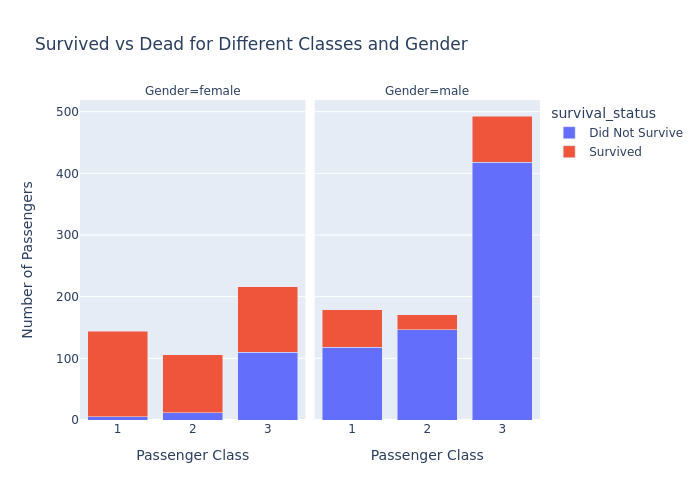

In [21]:
# Create a new column 'survival_status' for better labeling in the chart
titanic['survival_status'] = titanic['survived'].map({0: 'Did Not Survive', 1: 'Survived'})

# Group by 'pclass', 'sex', and 'survival_status', then count
grouped_data = titanic.groupby(['pclass', 'sex', 'survival_status']).size().reset_index(name='count')

# Create a stacked bar chart
fig = px.bar(grouped_data, x='pclass', y='count', color='survival_status',
             barmode='stack', facet_col='sex',
             title='Survived vs Dead for Different Classes and Gender',
             labels={'pclass': 'Passenger Class', 'count': 'Number of Passengers', 'sex': 'Gender'})
#fig.show()

# Save the figure as a PNG file
fig.write_image("survived_vs_dead.png")

# Display the image in the notebook
Image(filename="survived_vs_dead.png")



#### 4. Plot histogram of fares paid for passengers in cabin 30 (should include B30, C30, and D30)

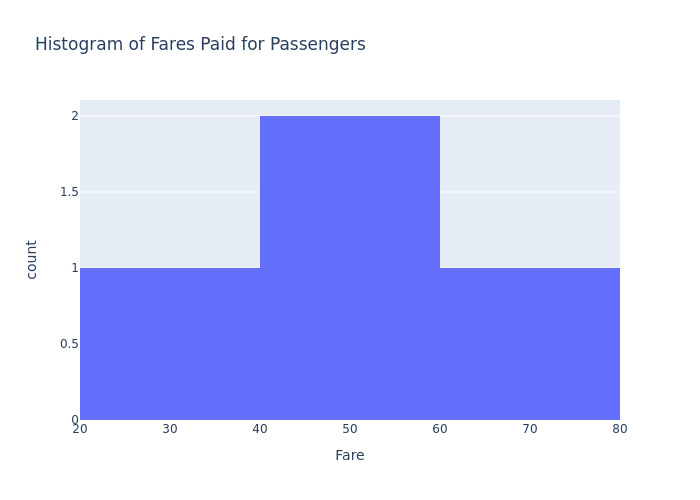

In [22]:

# Filtering the dataset for passengers in cabins B30, C30, and D30
selected_cabins = ['B30', 'C30', 'D30']
cabin_filtered_df = titanic[titanic['cabin'].isin(selected_cabins)]

# Create a histogram of fares
fig = px.histogram(cabin_filtered_df, x='fare',
                   title='Histogram of Fares Paid for Passengers',
                   labels={'fare': 'Fare'})
#fig.show()

# Save the figure as a PNG file
fig.write_image("num_by_cabin.png")

# Display the image in the notebook
Image(filename="num_by_cabin.png")



#### 5. Create a box plot of the fares by passenger class

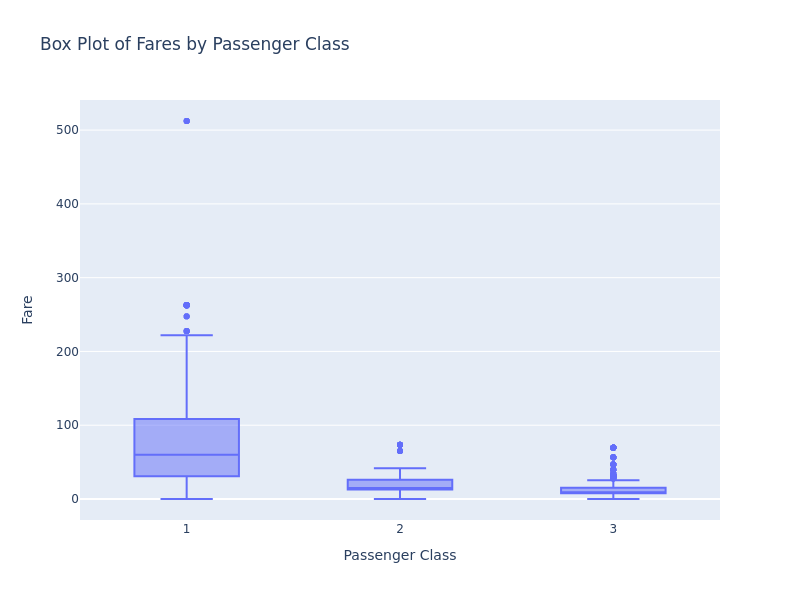

In [23]:
# Create a box plot of the fares by passenger class
fig = px.box(titanic, x='pclass', y='fare',
             title='Box Plot of Fares by Passenger Class',
             labels={'pclass': 'Passenger Class', 'fare': 'Fare'})
fig.update_layout(width=800, height=600)
#fig.show()
# Save the figure as a PNG file
fig.write_image("boxplot_fares_class.png")

# Display the image in the notebook
Image(filename="boxplot_fares_class.png")



#### 6. Create a box plot of the age by passenger class

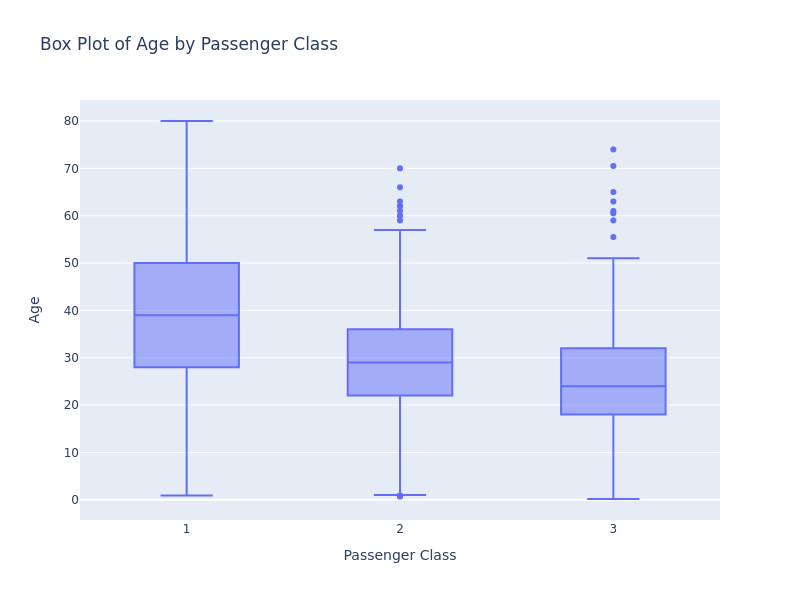

In [24]:
# Create a box plot of the age by passenger class
fig = px.box(titanic, x='pclass', y='age',
             title='Box Plot of Age by Passenger Class',
             labels={'pclass': 'Passenger Class', 'age': 'Age'})

# Update the layout to increase the size of the plot
fig.update_layout(width=800, height=600)

#fig.show()
# Save the figure as a PNG file
fig.write_image("boxplot_age_class.png")

# Display the image in the notebook
Image(filename="boxplot_age_class.png")



#### Try Plotly to do the above questions.
Points:
- **Total: 100**
- Code: 90
- Documentation within IPython using Markdown: 10